In [1]:
#cargamos librerias
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\analisis_campa-a_marketing\Data\marketingcampaigns.csv', sep=',',on_bad_lines='skip')

In [3]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [5]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [6]:
df.isnull().sum() / len(df) *100

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

<Axes: >

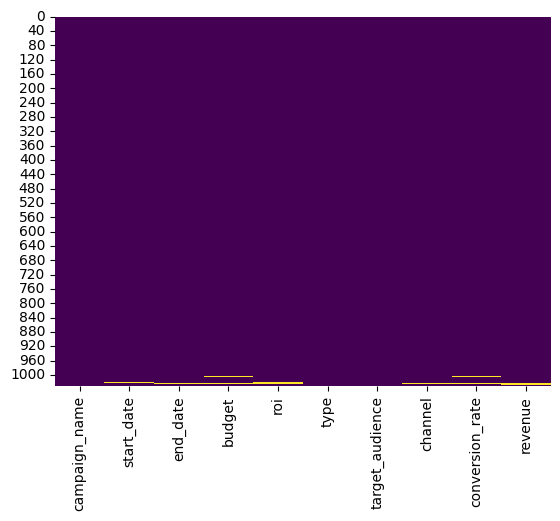

In [7]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [8]:
df.describe()

,roi,conversion_rate,revenue
count,1028.000000,1028.000000,1029.000000
mean,0.533804,0.541936,511591.195277
std,0.261869,0.267353,287292.729847
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,267820.250000
50%,0.530000,0.550000,518001.770000
75%,0.760000,0.770000,765775.140000
max,0.990000,1.500000,999712.490000


In [9]:
df[df.isnull().any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,NaN,B2C,promotion,0.52,206241.46
1005,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1021,Cloud-based scalable solution,NaN,2023-12-31,50000,NaN,event,B2C,paid,0.30,120000.00
1022,Broken-date campaign,2023-13-01,2024-01-01,25000,0.45,email,B2B,organic,NaN,87500.00
1023,Negative ROI test,2022-10-10,2023-05-05,-10000,-0.20,podcast,B2C,referral,0.10,NaN
1024,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00


In [10]:
df_copia = df.copy()

In [11]:
# Convertir la columna 'budget' a float64, forzando errores a NaN
df_copia['budget'] = pd.to_numeric(df_copia['budget'], errors='coerce')

# Convertir las columnas date a datetime, forzando errores a NaT
df_copia['start_date'] = pd.to_datetime(df_copia['start_date'], errors='coerce')
df_copia['end_date'] = pd.to_datetime(df_copia['end_date'], errors='coerce')

In [12]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_name    1032 non-null   object        
 1   start_date       1029 non-null   datetime64[ns]
 2   end_date         1029 non-null   datetime64[ns]
 3   budget           1028 non-null   float64       
 4   roi              1028 non-null   float64       
 5   type             1031 non-null   object        
 6   target_audience  1030 non-null   object        
 7   channel          1031 non-null   object        
 8   conversion_rate  1028 non-null   float64       
 9   revenue          1029 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 80.8+ KB


In [13]:
# Buscar filas donde la fecha de inicio es posterior a la fecha de fin en df_copia
fechas_incoherentes = df_copia[
    (df_copia['start_date'].notnull()) &
    (df_copia['end_date'].notnull()) &
    (df_copia['start_date'] > df_copia['end_date'])
]
fechas_incoherentes

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1030,Overlapping dates,2023-03-01,2022-12-31,60000.0,0.6,webinar,B2B,paid,0.7,90000.0


In [14]:
df_copia.at[1030, 'end_date'] = '2023-03-01 00:00:00'
df_copia.at[1030, 'start_date'] = '2022-12-31 00:00:00'

In [15]:
# Buscar valores incoherentes en columnas float de df_copia
# Por ejemplo: valores negativos en 'budget', 'roi', 'conversion_rate', 'revenue'

incoherentes = pd.DataFrame()

for col in ['budget', 'roi', 'conversion_rate', 'revenue']:
    incoherentes_col = df_copia[df_copia[col] < 0]
    if not incoherentes_col.empty:
        incoherentes = pd.concat([incoherentes, incoherentes_col])

incoherentes

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.0,-0.2,podcast,B2C,referral,0.1,NaN
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.0,-0.2,podcast,B2C,referral,0.1,NaN


In [16]:
df_copia = df_copia.drop(1023)

In [17]:
# Mostrar filas duplicadas en df_copia (todas las columnas)
df_copia[df_copia.duplicated()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1000,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1009,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1010,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1011,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
1012,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1013,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
1014,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,75569.28,0.59,social media,B2C,referral,0.67,558302.11
1015,Innovative context-sensitive framework,2023-03-01,2024-02-23,28964.45,0.59,email,B2C,referral,0.17,172882.59


In [18]:
df_copia = df_copia.drop_duplicates()

In [19]:
df_copia = df_copia.drop(index=1007)

In [20]:
df_copia

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaT,100000.00,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,NaN,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2022-12-31,2023-03-01,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [21]:
#valores únicos
Target_audience = df_copia['target_audience'].unique()
channels = df_copia['channel'].unique()
types = df_copia['type'].unique()
print(Target_audience)
print(channels)
print(types)

['B2B' 'B2C' 'social media' nan]
['organic' 'promotion' 'paid' 'referral' nan]
['email' 'podcast' 'webinar' 'social media' nan 'event' 'B2B']


In [22]:
df_copia[df_copia['type'].str.lower() == 'event']

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1021,Cloud-based scalable solution,NaT,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0


In [23]:
df_copia.at[1021, 'type'] = 'social media'

In [24]:
df_copia[df_copia['target_audience'] == 'social media']

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1024,Null-heavy campaign,2023-01-01,NaT,NaN,NaN,B2B,social media,NaN,NaN,NaN


In [25]:
df_copia.at[1024, 'target_audience'] = 'B2B'
df_copia.at[1024, 'type'] = 'social media'

In [26]:
df_copia[df_copia.isnull().any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1004,User-friendly client-driven service-desk,2023-01-06,2023-12-11,36800.58,0.40,NaN,B2C,promotion,0.52,206241.46
1005,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1006,Typo in Date,NaT,NaT,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00
1021,Cloud-based scalable solution,NaT,2023-12-31,50000.00,NaN,social media,B2C,paid,0.30,120000.00
1022,Broken-date campaign,NaT,2024-01-01,25000.00,0.45,email,B2B,organic,NaN,87500.00
1024,Null-heavy campaign,2023-01-01,NaT,NaN,NaN,social media,B2B,NaN,NaN,NaN
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaT,100000.00,NaN,podcast,NaN,referral,NaN,300000.00


In [27]:
df_copia['target_audience'] = df_copia['target_audience'].fillna('sin datos')
df_copia['channel'] = df_copia['channel'].fillna('sin datos')
df_copia['type'] = df_copia['type'].fillna('sin datos')
df_copia['start_date'] = df_copia['start_date'].fillna('sin datos')
df_copia['end_date'] = df_copia['end_date'].fillna('sin datos')
df_copia['budget'] = df_copia['budget'].fillna(0)
df_copia['roi'] = df_copia['roi'].fillna(0)
df_copia['conversion_rate'] = df_copia['conversion_rate'].fillna(0)
df_copia['revenue'] = df_copia['revenue'].fillna(0)

In [28]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00
1024,Null-heavy campaign,2023-01-01 00:00:00,sin datos,0.00,0.00,social media,B2B,sin datos,0.00,0.00
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00


In [29]:
#recurrimos al método KNN para ser más precisos en la imputación de los valores nulos en las columnas roi, conversion_rate y revenue
from sklearn.impute import KNNImputer
 
# Columnas que necesitas imputación
numerical_columns = ['conversion_rate', 'revenue']
 
# Crear KNN imputer
imputer = KNNImputer(n_neighbors=5)
 
# Trasnformación
df_copia[numerical_columns] = imputer.fit_transform(df_copia[numerical_columns])
 
# Comprobación
print("Porcentaje de nulos después de la imputación:")
print(df_copia[numerical_columns].isnull().sum() / df_copia.shape[0] * 100)
 
# Mostrar los datos
df_copia[numerical_columns].head()

Porcentaje de nulos después de la imputación:
conversion_rate    0.0
revenue            0.0
dtype: float64


,conversion_rate,revenue
0,0.40,709593.48
1,0.66,516609.10
2,0.28,458227.42
3,0.19,89958.73
4,0.81,47511.35


In [30]:
#Creamos actualizmos datos
df_copia['duration_day'] = (pd.to_datetime(df_copia['end_date'], errors='coerce') - pd.to_datetime(df_copia['start_date'], errors='coerce')).dt.days
df_copia['benefit'] = df_copia['revenue'] - df_copia['budget']
df_copia['benefit'] = df_copia['benefit'].round(3)
df_copia['cost_day'] = df_copia['budget'] / df_copia['duration_day']
df_copia['cost_day'] = df_copia['cost_day'].round(3)
df_copia['roi_calculado']= ((df_copia['revenue'] - df_copia['budget'] )/ df_copia['budget'])*100

In [31]:
df_copia

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
0,Public-key multi-tasking throughput,2023-04-01 00:00:00,2024-02-23 00:00:00,8082.30,0.35,email,B2B,organic,0.40,709593.48,328.0,701511.18,24.641,8679.598382
1,De-engineered analyzing task-force,2023-02-15 00:00:00,2024-04-22 00:00:00,17712.98,0.74,email,B2C,promotion,0.66,516609.10,432.0,498896.12,41.002,2816.556672
2,Balanced solution-oriented Local Area Network,2022-12-20 00:00:00,2023-10-11 00:00:00,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,295.0,373584.32,286.926,441.364175
3,Distributed real-time methodology,2022-09-26 00:00:00,2023-09-27 00:00:00,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,366.0,75368.98,39.863,516.588564
4,Front-line executive infrastructure,2023-07-07 00:00:00,2024-05-15 00:00:00,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,313.0,8219.45,125.533,20.918943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01 00:00:00,2023-08-01 00:00:00,20000.00,0.30,social media,B2B,organic,0.50,0.00,181.0,-20000.00,110.497,-100.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000
1029,Invalid budget,2022-12-01 00:00:00,2023-06-01 00:00:00,0.00,0.00,email,B2C,promotion,0.20,50000.00,182.0,50000.00,0.000,inf
1030,Overlapping dates,2022-12-31 00:00:00,2023-03-01 00:00:00,60000.00,0.60,webinar,B2B,paid,0.70,90000.00,60.0,30000.00,1000.000,50.000000


In [32]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,NaN,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1024,Null-heavy campaign,2023-01-01 00:00:00,sin datos,0.00,0.00,social media,B2B,sin datos,0.00,0.00,NaN,0.00,NaN,NaN
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00,153.0,15000.00,196.078,50.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [33]:
df_copia = df_copia.drop(1024)

In [34]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,NaN,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00,153.0,15000.00,196.078,50.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [35]:
# Media y moda de las columnas 'benefit' y 'duration_day'
media_benefit = df_copia['benefit'].mean()
moda_benefit = df_copia['benefit'].mode()[0]

media_duration = df_copia['duration_day'].mean()
moda_duration = df_copia['duration_day'].mode()[0]

media_cost = df_copia['cost_day'].mean()
moda_cost = df_copia['cost_day'].mode()[0]

media_budget = df_copia['budget'].mean()
moda_budget = df_copia['budget'].mode()[0]

media_roi = df_copia['roi_calculado'].mean()
moda_roi = df_copia['roi_calculado'].mode()[0]


print(f"Benefit - Media: {media_benefit:.2f}, Moda: {moda_benefit}")
print(f"Duration_day - Media: {media_duration:.2f}, Moda: {moda_duration}")
print(f"Cost_day - Media: {media_cost:.2f}, Moda: {moda_cost}")
print(f"Budget - Media: {media_budget:.2f}, Moda: {moda_budget}")
print(f"ROI - Media: {media_roi:.2f}, Moda: {moda_roi}")

Benefit - Media: 453437.12, Moda: 169440.88
Duration_day - Media: 365.33, Moda: 441.0
Cost_day - Media: 239.34, Moda: 0.0
Budget - Media: 59207.48, Moda: 0.0
ROI - Media: inf, Moda: inf


In [36]:
# Filtrar proyectos que son 'social media' y 'B2B'
filtro = (df_copia['type'].str.lower() == 'social media') & (df_copia['target_audience'].str.upper() == 'B2B')
media_presupuesto = df_copia.loc[filtro, 'budget'].mean()
media_dias = df_copia.loc[filtro, 'duration_day'].mean()

print(f"Media de presupuesto (social media & B2B): {media_presupuesto:.2f}")
print(f"Media de días (social media & B2B): {media_dias:.2f}")

Media de presupuesto (social media & B2B): 48184.24
Media de días (social media & B2B): 366.44


In [37]:
df_copia.at[1024, 'duration_day'] = 365
df_copia.at[1024, 'end_date'] = '2023-12-31 00:00:00'
df_copia.at[1024, 'budget'] = 48000.00
df_copia.at[1024, 'channel'] = 'organic' 

In [38]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,NaN,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00,153.0,15000.00,196.078,50.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [39]:
df_copia.at[1006, 'duration_day'] = 364

In [40]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,364.0,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00,153.0,15000.00,196.078,50.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [41]:
df_copia.at[1003, 'budget'] = 1849.748
df_copia.at[1005, 'budget'] = 12672.226
df_copia.at[1029, 'budget'] = 148235.871

In [42]:
df_copia.at[1030, 'end_date'] = '2023-03-01 00:00:00'
df_copia.at[1030, 'start_date'] = '2022-12-31 00:00:00'

In [43]:
#actualizmos datos
df_copia['duration_day'] = (pd.to_datetime(df_copia['end_date'], errors='coerce') - pd.to_datetime(df_copia['start_date'], errors='coerce')).dt.days
df_copia['benefit'] = df_copia['revenue'] - df_copia['budget']
df_copia['benefit'] = df_copia['benefit'].round(3)
df_copia['cost_day'] = df_copia['budget'] / df_copia['duration_day']
df_copia['cost_day'] = df_copia['cost_day'].round(3)
df_copia['roi_calculado']= ((df_copia['revenue'] - df_copia['budget'] )/ df_copia['budget'])*100

In [44]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,NaN,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.00,0.25,email,sin datos,paid,0.40,45000.00,153.0,15000.00,196.078,50.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,sin datos,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [45]:
# Agrupar y calcular medias y fechas mín/max
media_por_grupo = df_copia.groupby(['channel', 'type', 'target_audience']).agg(
    duration_day=('duration_day', 'mean'),
    budget=('budget', 'mean')
).reset_index()
media_por_grupo


,channel,type,target_audience,duration_day,budget
0,organic,email,B2B,389.214286,45717.885023
1,organic,email,B2C,350.038462,51654.225769
2,organic,podcast,B2B,407.500000,47614.129091
3,organic,podcast,B2C,329.000000,54445.772222
4,organic,social media,B2B,388.941176,45308.430588
5,organic,social media,B2C,376.392857,49205.956071
6,organic,webinar,B2B,363.500000,56195.666786
7,organic,webinar,B2C,411.333333,51124.469722
8,paid,email,B2B,383.617647,53665.752941
9,paid,email,B2C,324.387097,50282.268387


In [46]:
df_copia[df_copia['target_audience'] == 'sin datos']

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1026,Extra long name campaign test,2023-04-15 00:00:00,2023-09-15 00:00:00,30000.0,0.25,email,sin datos,paid,0.4,45000.0,153.0,15000.0,196.078,50.0
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.0,0.00,podcast,sin datos,referral,0.0,300000.0,NaN,200000.0,NaN,200.0


In [47]:
df_copia.at[1026, 'target_audience'] = 'B2C'
df_copia.at[1028, 'target_audience'] = 'B2B'

In [48]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1004,User-friendly client-driven service-desk,2023-01-06 00:00:00,2023-12-11 00:00:00,36800.58,0.40,sin datos,B2C,promotion,0.52,206241.46,339.0,169440.88,108.556,460.429917
1006,Typo in Date,sin datos,sin datos,50000.00,0.65,webinar,B2C,promotion,0.90,320000.00,NaN,270000.00,NaN,540.000000
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.00,0.00,social media,B2C,paid,0.30,120000.00,NaN,70000.00,NaN,140.000000
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.00,0.45,email,B2B,organic,0.00,87500.00,NaN,62500.00,NaN,250.000000
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.00,0.00,podcast,B2B,referral,0.00,300000.00,NaN,200000.00,NaN,200.000000


In [49]:
df_copia.at[1004, 'type'] = 'email'

In [50]:
fecha_inicio = pd.to_datetime(df_copia['start_date'], errors='coerce').min()
fecha_final = pd.to_datetime(df_copia['end_date'], errors='coerce').max()
print(f"Fecha de inicio más antigua: {fecha_inicio}")
print(f"Fecha de finalización más reciente: {fecha_final}")

Fecha de inicio más antigua: 2022-08-02 00:00:00
Fecha de finalización más reciente: 2025-06-01 00:00:00


In [51]:
# Filtrar según los criterios dados
filtro = (
    (df_copia['type'].str.lower() == 'webinar') &
    (df_copia['target_audience'].str.upper() == 'B2B') &
    (df_copia['channel'].str.lower() == 'promotion')
)

# Obtener fechas mínima y máxima
fecha_inicio_webinar = pd.to_datetime(df_copia.loc[filtro, 'start_date'], errors='coerce').min()
fecha_final_webinar = pd.to_datetime(df_copia.loc[filtro, 'end_date'], errors='coerce').max()

print(f"Fecha de inicio más antigua: {fecha_inicio_webinar}")
print(f"Fecha de finalización más reciente: {fecha_final_webinar}")

Fecha de inicio más antigua: 2022-08-09 00:00:00
Fecha de finalización más reciente: 2024-07-28 00:00:00


In [52]:
df_copia[df_copia.isin(['sin datos']).any(axis=1)]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
1006,Typo in Date,sin datos,sin datos,50000.0,0.65,webinar,B2C,promotion,0.9,320000.0,NaN,270000.0,NaN,540.0
1021,Cloud-based scalable solution,sin datos,2023-12-31 00:00:00,50000.0,0.00,social media,B2C,paid,0.3,120000.0,NaN,70000.0,NaN,140.0
1022,Broken-date campaign,sin datos,2024-01-01 00:00:00,25000.0,0.45,email,B2B,organic,0.0,87500.0,NaN,62500.0,NaN,250.0
1028,Random mess,2023-06-06 00:00:00,sin datos,100000.0,0.00,podcast,B2B,referral,0.0,300000.0,NaN,200000.0,NaN,200.0


In [53]:
df_copia.at[1006, 'start_date'] = '2022-08-09 00:00:00'
df_copia.at[1006, 'end_date'] = (pd.to_datetime(df_copia.at[1006, 'start_date']) + pd.Timedelta(days=396)).strftime('%Y-%m-%d %H:%M:%S')
df_copia.at[1021, 'start_date'] = (pd.to_datetime(df_copia.at[1006, 'end_date']) - pd.Timedelta(days=343)).strftime('%Y-%m-%d %H:%M:%S')
df_copia.at[1022, 'start_date'] = (pd.to_datetime(df_copia.at[1021, 'end_date']) + pd.Timedelta(days=389)).strftime('%Y-%m-%d %H:%M:%S')
df_copia.at[1028, 'end_date'] = (pd.to_datetime(df_copia.at[1022, 'start_date']) + pd.Timedelta(days=337)).strftime('%Y-%m-%d %H:%M:%S')

In [54]:
#actualizmos datos
df_copia['duration_day'] = (pd.to_datetime(df_copia['end_date'], errors='coerce') - pd.to_datetime(df_copia['start_date'], errors='coerce')).dt.days
df_copia['benefit'] = df_copia['revenue'] - df_copia['budget']
df_copia['benefit'] = df_copia['benefit'].round(3)
df_copia['cost_day'] = df_copia['budget'] / df_copia['duration_day']
df_copia['cost_day'] = df_copia['cost_day'].round(3)
df_copia['roi_calculado']= ((df_copia['revenue'] - df_copia['budget'] )/ df_copia['budget'])*100

In [55]:
df_copia = df_copia.drop(1024)

In [56]:
df_copia

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
0,Public-key multi-tasking throughput,2023-04-01 00:00:00,2024-02-23 00:00:00,8082.300,0.35,email,B2B,organic,0.40,709593.48,328.0,701511.180,24.641,8679.598382
1,De-engineered analyzing task-force,2023-02-15 00:00:00,2024-04-22 00:00:00,17712.980,0.74,email,B2C,promotion,0.66,516609.10,432.0,498896.120,41.002,2816.556672
2,Balanced solution-oriented Local Area Network,2022-12-20 00:00:00,2023-10-11 00:00:00,84643.100,0.37,podcast,B2B,paid,0.28,458227.42,295.0,373584.320,286.926,441.364175
3,Distributed real-time methodology,2022-09-26 00:00:00,2023-09-27 00:00:00,14589.750,0.47,webinar,B2B,organic,0.19,89958.73,366.0,75368.980,39.863,516.588564
4,Front-line executive infrastructure,2023-07-07 00:00:00,2024-05-15 00:00:00,39291.900,0.30,social media,B2B,promotion,0.81,47511.35,313.0,8219.450,125.533,20.918943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01 00:00:00,2023-08-01 00:00:00,20000.000,0.30,social media,B2B,organic,0.50,0.00,181.0,-20000.000,110.497,-100.000000
1028,Random mess,2023-06-06 00:00:00,2025-12-26 00:00:00,100000.000,0.00,podcast,B2B,referral,0.00,300000.00,934.0,200000.000,107.066,200.000000
1029,Invalid budget,2022-12-01 00:00:00,2023-06-01 00:00:00,148235.871,0.00,email,B2C,promotion,0.20,50000.00,182.0,-98235.871,814.483,-66.269973
1030,Overlapping dates,2022-12-31 00:00:00,2023-03-01 00:00:00,60000.000,0.60,webinar,B2B,paid,0.70,90000.00,60.0,30000.000,1000.000,50.000000


In [57]:
# Convertir las columnas date a datetime, forzando errores a NaT
df_copia['start_date'] = pd.to_datetime(df_copia['start_date'], errors='coerce')
df_copia['end_date'] = pd.to_datetime(df_copia['end_date'], errors='coerce')

In [59]:
#copio la base de datos y es con la que voy a trabajar
df_limpia = df_copia.copy()
df_limpia.to_csv(r'C:\Users\Usuario\Documents\GitHub\analisis_campa-a_marketing\Data\marketingcampaigns_limpia.csv', index=False)

In [60]:
roi_max = df_limpia['roi_calculado'].max()
roi_min = df_limpia['roi_calculado'].min()
print(f"ROI calculado mayor: {roi_max:.2f}")
print(f"ROI calculado menor: {roi_min:.2f}")

ROI calculado mayor: 88475.90
ROI calculado menor: -100.00


In [61]:

df_copia[df_copia['roi_calculado'] <= 0] 

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
14,Innovative web-enabled function,2022-11-05,2023-09-05,36848.300,0.92,webinar,B2C,referral,0.10,4190.95,304.0,-32657.350,121.212,-88.626477
24,Horizontal hybrid instruction set,2022-08-26,2024-07-24,48366.500,0.21,social media,B2B,promotion,0.87,41004.95,698.0,-7361.550,69.293,-15.220349
28,Seamless clear-thinking product,2022-11-18,2023-10-05,99838.630,0.63,email,B2B,organic,0.18,14073.59,321.0,-85765.040,311.024,-85.903663
60,Persevering web-enabled workforce,2023-06-23,2024-01-03,79220.800,0.60,social media,B2C,paid,0.30,29575.48,194.0,-49645.320,408.355,-62.667027
83,Reverse-engineered foreground approach,2023-02-22,2024-02-18,52125.200,0.16,webinar,B2C,referral,0.80,27754.76,361.0,-24370.440,144.391,-46.753662
202,Focused responsive open architecture,2022-11-09,2024-01-28,91490.920,0.93,webinar,B2C,referral,0.95,38601.99,445.0,-52888.930,205.598,-57.807846
240,Decentralized incremental synergy,2023-05-18,2023-08-24,78742.390,0.81,social media,B2C,referral,0.79,10253.30,98.0,-68489.090,803.494,-86.978678
256,Grass-roots reciprocal core,2022-11-07,2024-01-19,85249.470,0.97,social media,B2B,paid,0.90,34642.19,438.0,-50607.280,194.633,-59.363747
267,Re-contextualized regional pricing structure,2023-03-18,2024-06-29,93497.400,0.44,email,B2B,promotion,0.37,58328.00,469.0,-35169.400,199.355,-37.615378
269,Reactive client-driven paradigm,2023-04-09,2023-10-02,63250.910,0.72,email,B2C,paid,0.76,32045.66,176.0,-31205.250,359.380,-49.335654


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [63]:
df_limpia

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_day,benefit,cost_day,roi_calculado
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.300,0.35,email,B2B,organic,0.40,709593.48,328.0,701511.180,24.641,8679.598382
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.980,0.74,email,B2C,promotion,0.66,516609.10,432.0,498896.120,41.002,2816.556672
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.100,0.37,podcast,B2B,paid,0.28,458227.42,295.0,373584.320,286.926,441.364175
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.750,0.47,webinar,B2B,organic,0.19,89958.73,366.0,75368.980,39.863,516.588564
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.900,0.30,social media,B2B,promotion,0.81,47511.35,313.0,8219.450,125.533,20.918943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000.000,0.30,social media,B2B,organic,0.50,0.00,181.0,-20000.000,110.497,-100.000000
1028,Random mess,2023-06-06,2025-12-26,100000.000,0.00,podcast,B2B,referral,0.00,300000.00,934.0,200000.000,107.066,200.000000
1029,Invalid budget,2022-12-01,2023-06-01,148235.871,0.00,email,B2C,promotion,0.20,50000.00,182.0,-98235.871,814.483,-66.269973
1030,Overlapping dates,2022-12-31,2023-03-01,60000.000,0.60,webinar,B2B,paid,0.70,90000.00,60.0,30000.000,1000.000,50.000000
